This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Working with Keras: A deep dive

핵심 내용
- Sequential 클래스, 함수형 API, Model 서브 클래싱으로 케라스 모델 만들기
- 케라스에 내장된 훈련과 평가 루프 사용하기
- 케라스 콜백을 사용해서 훈련 커스터마이징하기
- 텐서보드를 사용하여 훈련과 평가 지표 모니터링하기
- 훈련과 평가 루프를 밑바닥부터 작성하기

## A spectrum of workflows

## Different ways to build Keras models

- Sequential Model : 가장 시작하기 쉬운 API
- 함수형 API
    - 그래프 같은 모델 구조
    - 사용성과 유연성 사이의 적절한 중간 지점
    - 가장 널리 사용되는 모델 구축 API
- Model subclassing
    - 모든 것을 밑바닥부터 직접 만들 수 있는 저수준 방법
    - 모든 상세한 내용을 완전히 제어하고 싶은 경우에 적합
    - 케라스 내장 기능을 사용하지 못하기 때문에 실수 발생 위험

### The Sequential model

**The `Sequential` class**

In [1]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

Metal device set to: Apple M2


2024-05-28 11:50:05.610462: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-28 11:50:05.610547: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


**Incrementally building a Sequential model**

In [2]:
model = keras.Sequential()
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(10, activation="softmax"))

**Calling a model for the first time to build it**

- build() 메서드가 호출 전의 모델은 가중치가 없다
- 가중치를 만들기 위해 모델을 호출한다

In [3]:
model.build(input_shape=(None, 3))
model.weights

[<tf.Variable 'dense_2/kernel:0' shape=(3, 64) dtype=float32, numpy=
 array([[-0.15838352,  0.06596014,  0.02237591, -0.16446003, -0.05720431,
          0.01696843, -0.0617813 ,  0.06242421, -0.24874845,  0.19458121,
         -0.18112329,  0.08718592,  0.12933055,  0.0768356 ,  0.13019934,
         -0.2290363 ,  0.19498739,  0.16505137, -0.24667603, -0.19129565,
         -0.09392069,  0.07101279,  0.06583434, -0.00248125, -0.10739301,
         -0.03421432,  0.05959138, -0.28507185,  0.07934582,  0.24016386,
          0.24314857, -0.17352495, -0.10135338,  0.17626938,  0.12926778,
          0.19102812, -0.02107519, -0.19232777, -0.18471992,  0.18587974,
          0.02561972,  0.03175488, -0.29152817, -0.11453974, -0.087117  ,
          0.04860508,  0.11802456,  0.08848652, -0.1660229 , -0.15778498,
         -0.05611503, -0.20514748,  0.08135769,  0.07327187,  0.13507974,
         -0.195079  , -0.0443019 ,  0.23297894, -0.27182707,  0.09616292,
         -0.13387753,  0.12772718, -0.28171

**The summary method**

In [4]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 64)                256       
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


- 케라스에서는 모델과 층을 포함해서 모든 것에 이름을 지정할 수 있음

**Naming models and layers with the `name` argument**

In [5]:
model = keras.Sequential(name="my_example_model")
model.add(layers.Dense(64, activation="relu", name="my_first_layer"))
model.add(layers.Dense(10, activation="softmax", name="my_last_layer"))
model.build((None, 3))
model.summary()

Model: "my_example_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_first_layer (Dense)      (None, 64)                256       
                                                                 
 my_last_layer (Dense)       (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


**Specifying the input shape of your model in advance**
- Sequential 모델의 가중치를 바로 생성하는 방법

In [6]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))
model.add(layers.Dense(64, activation="relu"))

In [7]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
Total params: 256
Trainable params: 256
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.add(layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                256       
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


### The Functional API

Sequential Model
- 사용하기 쉽지만 적용할 수 있는 곳이 극히 제한적
- 하나의 입력과 하나의 출력을 가지며 순서대로 층을 쌓은 모델만 표현할 수 있음

Functional API
- 다중 입력/출력, 비선형적인 구조를 가진 모델에서 주로 사용

#### A simple example

**A simple Functional model with two `Dense` layers**

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")
features = layers.Dense(64, activation="relu")(inputs)
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [10]:
inputs = keras.Input(shape=(3,), name="my_input")

In [11]:
inputs.shape

TensorShape([None, 3])

- 각 샘플의 크기가 (3,)인 배치를 처리할 것임
- 배치당 샘플의 개수는 가변적(배치 크기가 None)으로 지정

In [12]:
inputs.dtype

tf.float32

- 심볼릭 텐서 
    - 실제 데이터를 가지고 있지 않지만 사용할 때 모델이 보게 될 데이터 텐서의 사양이 인코딩 되어있음
    - 미래의 텐서를 나타냄

In [13]:
features = layers.Dense(64, activation="relu")(inputs)

In [14]:
features.shape

TensorShape([None, 64])

In [15]:
outputs = layers.Dense(10, activation="softmax")(features)
model = keras.Model(inputs=inputs, outputs=outputs)

In [16]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 my_input (InputLayer)       [(None, 3)]               0         
                                                                 
 dense_8 (Dense)             (None, 64)                256       
                                                                 
 dense_9 (Dense)             (None, 10)                650       
                                                                 
Total params: 906
Trainable params: 906
Non-trainable params: 0
_________________________________________________________________


#### Multi-input, multi-output models

**A multi-input, multi-output Functional model**

In [17]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

# 모델의 입력을 정의
title = keras.Input(shape=(vocabulary_size,), name="title")          
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")

features = layers.Concatenate()([title, text_body, tags]) # 입력 특성을 하나의 텐서 features로 연결
features = layers.Dense(64, activation="relu")(features)  # 중간층을 적용하여 입력 특성을 더 풍부한 표현으로 재결합

# 모델의 출력 정의
priority = layers.Dense(1, activation="sigmoid", name="priority")(features) 
department = layers.Dense(
    num_departments, activation="softmax", name="department")(features)

# 입력과 출력을 지정하여 모델을 만듦
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

#### Training a multi-input, multi-output model

**Training a model by providing lists of input & target arrays**

- Sequential 모델을 훈련하는 것과 거의 같은 방법으로 훈련할 수 있음
- 입력과 출력 데이터의 리스트로 fit() 메서드를 호출하면 됨
- 데이터의 리스트는 Model 클래스에 전달한 순서와 같아야함

In [18]:
import numpy as np

num_samples = 1280

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size)) # dummy 입력 데이터
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags)) # dummy 입력 데이터

priority_data = np.random.random(size=(num_samples, 1)) # dummy 타겟 데이터
department_data = np.random.randint(0, 2, size=(num_samples, num_departments)) # dummy 타겟 데이터

model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])
model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=1)
model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])
priority_preds, department_preds = model.predict([title_data, text_body_data, tags_data])

2024-05-28 11:50:06.249311: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2024-05-28 11:50:06.706346: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 6/40 [===>..........................] - ETA: 0s - loss: 5.6493 - priority_loss: 0.3355 - department_loss: 5.3138 - priority_mean_absolute_error: 0.4948 - department_accuracy: 0.0885

2024-05-28 11:50:08.135948: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 3ms/step


2024-05-28 11:50:08.947920: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


입력 순서에 신경 쓰고 싶지 않다면 Input 객체와 출력 층에 부여한 이름을 활용해서 데이터를 딕셔너리로 전달 할 수 있음

**Training a model by providing dicts of input & target arrays**

In [19]:
model.compile(optimizer="rmsprop",
              loss={"priority": "mean_squared_error", "department": "categorical_crossentropy"},
              metrics={"priority": ["mean_absolute_error"], "department": ["accuracy"]})
model.fit({"title": title_data, "text_body": text_body_data, "tags": tags_data},
          {"priority": priority_data, "department": department_data},
          epochs=1)
model.evaluate({"title": title_data, "text_body": text_body_data, "tags": tags_data},
               {"priority": priority_data, "department": department_data})
priority_preds, department_preds = model.predict(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

2024-05-28 11:50:09.566535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 5/40 [==>...........................] - ETA: 0s - loss: 27.0293 - priority_loss: 0.3437 - department_loss: 26.6855 - priority_mean_absolute_error: 0.5018 - department_accuracy: 0.3187

2024-05-28 11:50:10.689164: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 3ms/step


2024-05-28 11:50:11.497260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


#### The power of the Functional API: Access to layer connectivity

- 함수형 모델은 명시적인 그래프 데이터 구조임
- 층이 어떻게 연결되어 있는지 조사하고 이전 그래프 노트(층의 출력)을 새 모델의 일부로 재 사용 할 수 있음
- 모델 시각화, 특성 추출이라는 기능이 가능

In [20]:
# !pip install pydot
# !pip install graphviz

모델의 연결 구조(topology) 시각화

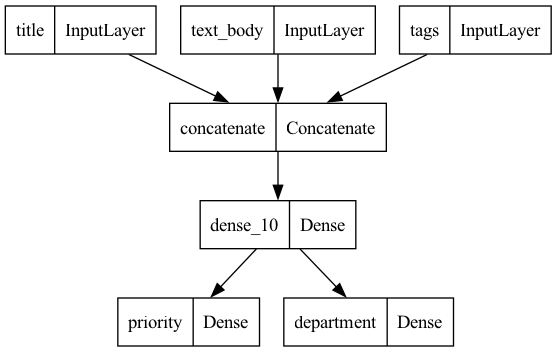

In [21]:
keras.utils.plot_model(model, "ticket_classifier.png")

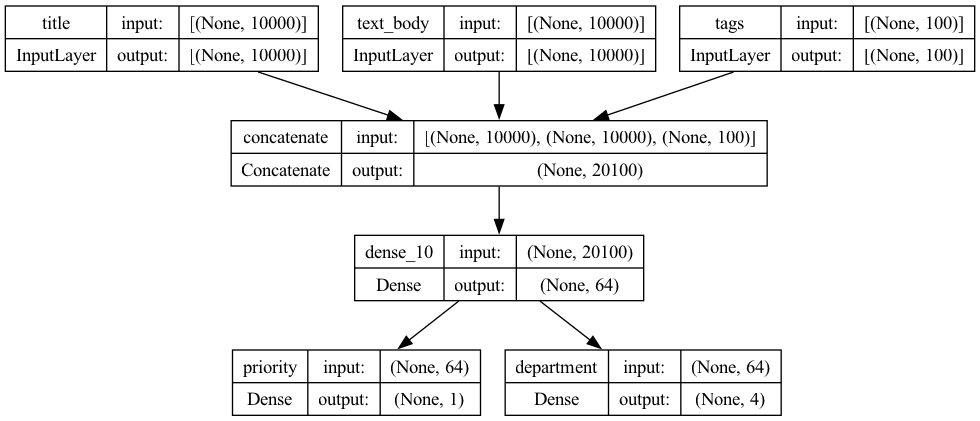

In [22]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", show_shapes=True)

**Retrieving the inputs or outputs of a layer in a Functional model**

In [23]:
model.layers

In [24]:
model.layers[3].input

[<KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'title')>,
 <KerasTensor: shape=(None, 10000) dtype=float32 (created by layer 'text_body')>,
 <KerasTensor: shape=(None, 100) dtype=float32 (created by layer 'tags')>]

In [25]:
model.layers[3].output

<KerasTensor: shape=(None, 20100) dtype=float32 (created by layer 'concatenate')>

- 이를 통해 특성 추출(feature extraction)을 수행하여 다른 모델에서 중간 특성을 재사용하는 모델을 만들 수 있음

**Creating a new model by reusing intermediate layer outputs**

In [26]:
features = model.layers[4].output
difficulty = layers.Dense(3, activation="softmax", name="difficulty")(features)

new_model = keras.Model(
    inputs=[title, text_body, tags],
    outputs=[priority, department, difficulty])

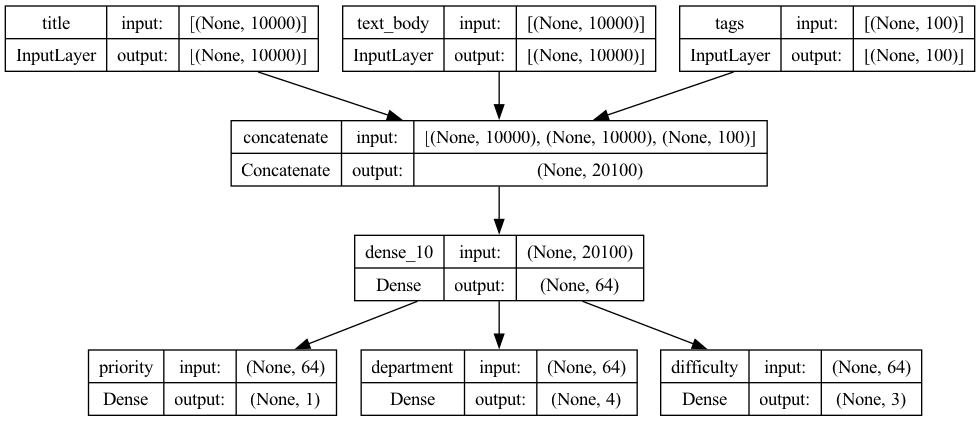

In [27]:
keras.utils.plot_model(new_model, "updated_ticket_classifier.png", show_shapes=True)

### Subclassing the Model class

- `__init__()` 메서드에서 모델이 사용할 층을 정의
- `call()` 메서드에서 앞서 만든 층을 사용하여 모델의 정방향 패스를 정의
- 서브 클래스의 객체를 만들고 데이터와 함께 호출하여 가중치를 만듦

#### Rewriting our previous example as a subclassed model

**A simple subclassed model**

In [28]:
class CustomerTicketModel(keras.Model):

    def __init__(self, num_departments):
        super().__init__()  # 부모 클래스의 생성자를 호출
        # 생성자에서 층을 정의
        self.concat_layer = layers.Concatenate() 
        self.mixing_layer = layers.Dense(64, activation="relu")
        self.priority_scorer = layers.Dense(1, activation="sigmoid")
        self.department_classifier = layers.Dense(
            num_departments, activation="softmax")
    
    def call(self, inputs):
        '''
        call() 메서드에서 정방향 패스를 정의
        '''
        title = inputs["title"]
        text_body = inputs["text_body"]
        tags = inputs["tags"]

        features = self.concat_layer([title, text_body, tags])
        features = self.mixing_layer(features)
        priority = self.priority_scorer(features)
        department = self.department_classifier(features)
        return priority, department

모델을 정의하고 나면 이 클래스의 객체를 만들 수 있음    
Layer 클래스와 마찬가지로 어떤 데이터로 처음 호출할 때 가중치를 만듦

In [29]:
model = CustomerTicketModel(num_departments=4)

priority, department = model(
    {"title": title_data, "text_body": text_body_data, "tags": tags_data})

- Layer 클래스 상속과 매우 비슷함
- Layer 클래스 상속과 Model 클래스 상속의 차이점은?
    - '층'은 모델을 만드는 데 사용하는 구성 요소
    - '모델'은 실제로 훈련하고 추론에 사용하는 최상위 객체
    - Model class는 `fit(), evaluate(), predict()` 메서드를 가지고 있음
    - Layer class에는 이런 메서드가 없음

Sequential이나 함수형 모델과 마찬가지로 Model을 상속하여 만든 모델을 컴파일하고 훈련할 수 있음

In [30]:
model.compile(optimizer="rmsprop",
              # 손실과 측정 지표로 전달하는 값은 call() 메서드가 반환하는 것과 정확히 일치해야 함
              # (여기에서는 2개의 원소를 가진 리스트)
              loss=["mean_squared_error", "categorical_crossentropy"],
              metrics=[["mean_absolute_error"], ["accuracy"]])

# 입력 데이터의 구조는 call() 메서드가 기대하는 것과 정확히 일치해야 함
model.fit({"title": title_data,
           "text_body": text_body_data,
           "tags": tags_data},
          # target 데이터 구조는 call() 메서드가 반환하는 것과 정확히 일치해야함
          [priority_data, department_data], 
          epochs=1)
model.evaluate({"title": title_data,
                "text_body": text_body_data,
                "tags": tags_data},
               [priority_data, department_data])
priority_preds, department_preds = model.predict({"title": title_data,
                                                  "text_body": text_body_data,
                                                  "tags": tags_data})

2024-05-28 11:50:12.995648: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 5/40 [==>...........................] - ETA: 0s - loss: 25.2492 - output_1_loss: 0.3437 - output_2_loss: 24.9055 - output_1_mean_absolute_error: 0.5018 - output_2_accuracy: 0.1375

2024-05-28 11:50:14.215050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


36/40 [==========================>...] - ETA: 0s

2024-05-28 11:50:15.211230: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 0s 5ms/step


Model subclassing workflow는 모델을 만드는 가장 유연한 방법
- 층의 유향 비순환 그래프로 표현할 수 없는 모델을 만들 수 있음
    - call() 메서드가 for 루프 안에서 층을 사용하거나 재귀적으로 호출하는 모델

#### Beware: What subclassed models don't support

- 서브클래싱 모델에서는 모델 로직을 많이 책임져야 하며 잠재적인 오류 가능성이 훨씬 큼
- 층이 서로 연결되는 방식이 call() 메서드 안에 감추어지기 때문에 이 정보를 활용할 수 없음
- summary() 메서드가 층의 연결 구조를 출력할 수 없음
- plot_model() 함수로 모델의 구조를 그래프로 그릴 수 없음
- 이 모델의 객체를 생성하고 나면 정방향 패스는 완전한 블랙박스가 되어 버림

### Mixing and matching different components

- 세 가지 패턴 중 하나를 선택한다고 다른 패턴의 사용을 제한하는 것은 아님
- 케라스 API로 만든 모델은 Sequential, functional, subclassing 모델인지에 상관없이 부드럽게 서로 상호 운영할 수 있음

**Creating a Functional model that includes a subclassed model**

In [31]:
class Classifier(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        if num_classes == 2:
            num_units = 1
            activation = "sigmoid"
        else:
            num_units = num_classes
            activation = "softmax"
        self.dense = layers.Dense(num_units, activation=activation)

    def call(self, inputs):
        return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation="relu")(inputs)
outputs = Classifier(num_classes=10)(features)
model = keras.Model(inputs=inputs, outputs=outputs)

**Creating a subclassed model that includes a Functional model**

In [32]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation="sigmoid")(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class MyModel(keras.Model):

    def __init__(self, num_classes=2):
        super().__init__()
        self.dense = layers.Dense(64, activation="relu")
        self.classifier = binary_classifier

    def call(self, inputs):
        features = self.dense(inputs)
        return self.classifier(features)

model = MyModel()

### Remember: Use the right tool for the job

- 각 방법은 장단점이 있으므로 현재 작업에 가장 잘 맞는 것을 선택하는 것이 중요
- 일반적으로 함수형 API가 쉬운 사용성과 유연성 사이에 적절한 절충점임

## Using built-in training and evaluation loops

**The standard workflow: `compile()`, `fit()`, `evaluate()`, `predict()`**

In [33]:
from tensorflow.keras.datasets import mnist

# 1) 모델 생성 (나중에 재사용하기 용이하기 위해 별도의 함수로 만듦)
def get_mnist_model():
    inputs = keras.Input(shape=(28 * 28,))
    features = layers.Dense(512, activation="relu")(inputs)
    features = layers.Dropout(0.5)(features)
    outputs = layers.Dense(10, activation="softmax")(features)
    model = keras.Model(inputs, outputs)
    return model

# 2) load and split data
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

model = get_mnist_model()
# 3) compile
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
# 4) fit
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
# 5) evaluate
test_metrics = model.evaluate(test_images, test_labels)
# 6) predict
predictions = model.predict(test_images)

Epoch 1/3


2024-05-28 11:50:16.039238: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2837 - accuracy: 0.9161

2024-05-28 11:50:27.884140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 13s 8ms/step - loss: 0.2837 - accuracy: 0.9161 - val_loss: 0.1452 - val_accuracy: 0.9586
Epoch 2/3
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1535 - accuracy: 0.9567 - val_loss: 0.1325 - val_accuracy: 0.9660
Epoch 3/3
 87/313 [=======>......................] - ETA: 0s

2024-05-28 11:50:54.777677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


- 사용자 정의 측정 지표를 전달
- fit 메서드에 callback을 전달하여 훈련하는 동안 특정 시험에 수행될 행동을 예약

### Writing your own metrics

- 케라스 지표는 `keras.metrics.Metric` 클래스를 상속한 클래스임
- 층과 마찬가지로 지표는 텐서플로 변수에 내부 상태를 저장
- 층과 다른 점은 이 변수가 역전파로 업데이트 되지 않음
- 따라서 상태 업데이트 로직을 update_state() 메서드 안에 직접 작성해야 함

**Implementing a custom metric by subclassing the `Metric` class**

In [34]:
import tensorflow as tf

class RootMeanSquaredError(keras.metrics.Metric): # metric 클래스를 상속

    def __init__(self, name="rmse", **kwargs): # 생성자에서 상태 변수를 정의
        super().__init__(name=name, **kwargs)  # 층과 마찬가지로 add_weight() 메서드 사용
        self.mse_sum = self.add_weight(name="mse_sum", initializer="zeros")
        self.total_samples = self.add_weight(
            name="total_samples", initializer="zeros", dtype="int32")

    def update_state(self, y_true, y_pred, sample_weight=None):
        '''
        상태 업데이트 로직을 구현
            - y_true : 배치의 타깃(label)
            - y_pred : 이에 해당하는 모델의 예측
            - sample_weight : 여기서는 사용하지 않으므로 무시해도 괜찮음
        '''
        # y_pred는 각 클래스에 대한 확률을 담고 있으므로 정수 레이블인 y_true를 이에 맞추어 원-핫 인코딩으로 변환
        y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
        mse = tf.reduce_sum(tf.square(y_true - y_pred))
        self.mse_sum.assign_add(mse)
        num_samples = tf.shape(y_pred)[0]
        self.total_samples.assign_add(num_samples)

    def result(self): # 현재 지표값 반환
        return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

    def reset_state(self):
        '''
        객체를 다시 생성하지 않고 상태를 초기화하는 방법
        이렇게 함으로써 지표 객체 하나를 서로 다른 훈련 반복에 사용하거나 훈련과 평가에 모두 사용할 수 있음
        '''
        self.mse_sum.assign(0.)
        self.total_samples.assign(0)

In [35]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy", RootMeanSquaredError()])
model.fit(train_images, train_labels,
          epochs=3,
          validation_data=(val_images, val_labels))
test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3


2024-05-28 11:50:55.821125: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2821 - accuracy: 0.9163 - rmse: 7.1986

2024-05-28 11:51:09.080752: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 15s 9ms/step - loss: 0.2821 - accuracy: 0.9163 - rmse: 7.1986 - val_loss: 0.1498 - val_accuracy: 0.9582 - val_rmse: 7.3679
Epoch 2/3
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1520 - accuracy: 0.9564 - rmse: 7.3656 - val_loss: 0.1351 - val_accuracy: 0.9641 - val_rmse: 7.4045
Epoch 3/3
313/313 [==============================] - 2s 5ms/step - loss: 0.1131 - accuracy: 0.9712 - rmse: 7.4360


### Using callbacks

- 케라스 콜백은 fit() 메서드 호출 시 모델에 전달되는 객체(특정 메서드를 구현한 클래스 객체)임
- 훈련하는 동안 모델은 여러 지점에서 콜백을 호출함
- 모델의 상태와 성능에 대한 모든 정보를 접근하고 훈련 중지, 모델 저장, 가중치 적재 또는 모델 상태 변경 등을 처리할 수 있음

콜백 사용 사례
- 모델 체크포인트 저장
- 조기 종료
- 훈련하는 동안 하이퍼파라미터 값을 동적으로 조정
- 훈련과 검증 지표를 로그에 기록하거나 모델이 학습한 표현이 업데이트 될 때마다 시각화

#### The EarlyStopping and ModelCheckpoint callbacks

- EarlyStopping 콜백 : 정해진 에포크 동안 모니터링 지표가 향상되지 않을 때 훈련을 중지
    - 일반적으로 이 콜백은 훈련하는 동안 모델을 계속 저장해주는 Model Checkpoint 콜백과 함께 사용 

**Using the `callbacks` argument in the `fit()` method**

In [36]:
callbacks_list = [ 
    # fit() 메서드의 callbacks 매개변수를 사용하여 콜백의 리스트를 모델로 전달. 몇 개의 콜백이라도 전달할 수 있음
    keras.callbacks.EarlyStopping(       # 성능향상이 멈추면 훈련 중지
        monitor="val_accuracy",          # 모델의 검증 정확도를 모니터링
        patience=2,                      # 두 번의 에포크 동안 정확도가 향상되지 않으면 훈련 중지
    ),
    keras.callbacks.ModelCheckpoint(     # 매 에포크 끝에서 현재 가중치를 저장
        filepath="checkpoint_path.keras",# 모델 파일의 저장 경로
        monitor="val_loss",              
        save_best_only=True,             # val_loss가 좋아지지 않으면 모델 파일을 덮어쓰지 않는다
    )
]
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])         # 정확도를 모니터링하므로 모델 지표에 포함되어야 함
model.fit(train_images, train_labels,       
          epochs=10,
          callbacks=callbacks_list,
          # 콜백이 검증 손실과 검증 정확도를 모니터링하기 때문에 fit() 메서드를 호출할 때 validation_data 매개 변수로 검증 데이터를 전달해야함.
          # 학습 후 항상 모델을 수동으로 저장할 수 있음
          validation_data=(val_images, val_labels))

Epoch 1/10


2024-05-28 11:51:38.492706: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2844 - accuracy: 0.9164

2024-05-28 11:51:49.695962: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 13s 8ms/step - loss: 0.2844 - accuracy: 0.9164 - val_loss: 0.1503 - val_accuracy: 0.9590
Epoch 2/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1541 - accuracy: 0.9564 - val_loss: 0.1198 - val_accuracy: 0.9677
Epoch 3/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.1230 - accuracy: 0.9657 - val_loss: 0.1223 - val_accuracy: 0.9684
Epoch 4/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1123 - accuracy: 0.9701 - val_loss: 0.1177 - val_accuracy: 0.9717
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1010 - accuracy: 0.9748 - val_loss: 0.1099 - val_accuracy: 0.9755
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 0.0957 - accuracy: 0.9768 - val_loss: 0.1179 - val_accuracy: 0.9748
Epoch 7/10
1563/1563 [==============================] - 12s 7ms/step - loss: 0.0911 - accuracy: 0.9780 - val_loss: 0.1095 - val_accuracy: 0.9

In [37]:
model = keras.models.load_model("checkpoint_path.keras")

### Writing your own callbacks

**Creating a custom callback by subclassing the `Callback` class**

In [38]:
from matplotlib import pyplot as plt

class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs):
        self.per_batch_losses = []

    def on_batch_end(self, batch, logs):
        self.per_batch_losses.append(logs.get("loss"))

    def on_epoch_end(self, epoch, logs):
        plt.clf()
        plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses,
                 label="Training loss for each batch")
        plt.xlabel(f"Batch (epoch {epoch})")
        plt.ylabel("Loss")
        plt.legend()
        plt.savefig(f"plot_at_epoch_{epoch}")
        self.per_batch_losses = []

Epoch 1/10


2024-05-28 11:53:34.599634: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - ETA: 0s - loss: 0.2810 - accuracy: 0.9170

2024-05-28 11:53:45.979430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 13s 8ms/step - loss: 0.2810 - accuracy: 0.9170 - val_loss: 0.1678 - val_accuracy: 0.9541
Epoch 2/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.1569 - accuracy: 0.9556 - val_loss: 0.1423 - val_accuracy: 0.9624
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1263 - accuracy: 0.9653 - val_loss: 0.1124 - val_accuracy: 0.9719
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1121 - accuracy: 0.9708 - val_loss: 0.1186 - val_accuracy: 0.9724
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1018 - accuracy: 0.9736 - val_loss: 0.1143 - val_accuracy: 0.9726
Epoch 6/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.0996 - accuracy: 0.9760 - val_loss: 0.1121 - val_accuracy: 0.9764
Epoch 7/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.0897 - accuracy: 0.9785 - val_loss: 0.1099 - val_accuracy: 0.9

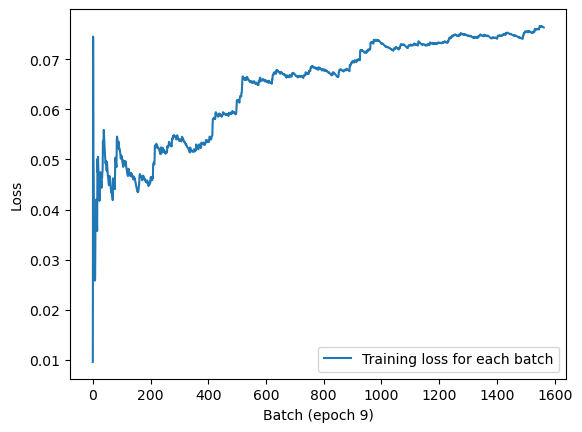

In [39]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          callbacks=[LossHistory()],
          validation_data=(val_images, val_labels))

### Monitoring and visualization with TensorBoard

In [40]:
model = get_mnist_model()
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

tensorboard = keras.callbacks.TensorBoard(
    log_dir="/full_path_to_your_log_dir",
)
model.fit(train_images, train_labels,
          epochs=10,
          validation_data=(val_images, val_labels),
          callbacks=[tensorboard])

2024-05-28 11:55:39.927085: W tensorflow/core/framework/op_kernel.cc:1745] OP_REQUIRES failed at summary_kernels.cc:65 : PERMISSION_DENIED: /full_path_to_your_log_dir; Read-only file system


PermissionDeniedError: /full_path_to_your_log_dir; Read-only file system [Op:CreateSummaryFileWriter]

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /full_path_to_your_log_dir

## Writing your own training and evaluation loops

- 내장 fit() 메서드로 충분하지 않은 상황이면 자신만의 훈련 로직을 직접 작성해야함

전형적인 훈련 루프
1. 현재 배치 데이터에 대한 손실 값을 얻기 위해 GradientTape 안에서 정방향 패스를 실행(모델의 출력 계산)
2. 모델 가중치에 대한 손실의 Gradient를 계산
3. 현재 배치 데이터에 대한 손실 값은 낮추는 방향으로 모델 가중치를 업데이트

### Training versus inference

Dropout 층과 같은 일부 케라스 층
- 훈련과 (예측을 만들기 위해 모델을 사용하는) 추론에서 동작이 다름
    - call() 메서드에 training boolean 매개변수 제공
- dropout(inputs, training=True)와 같이 호출하면 이전 층의 활성화 출력 값을 일부 랜덤하게 제외
- dropout(inputs, training=False)와 같이 호출하면 아무런 일을 수행하지 않음
- 함수형 모델과 Sequential 모델도 call() 메서드에서 training 매개변수 제공
    - 정방향 패스에서 케라스 모델을 호출할 때는 training=True로 지정해야 함
    - 정방향 패스 : predictions = model(inputs, training=True)
        - 모델 가중치 Gradient를 추출할 때 tape.gradients(loss, model.weights)가 아니라 tape.gradient(loss, model..trainable_weights)를 사용해야 함

가중치의 종류(층, 모델)
- 훈련 가능한 가중치 : Dense 층의 커널과 편향처럼 모델의 손실을 최소화하기 위해 역전파로 업데이트
- 훈련되지 않는 가중치 : 해당 층의 정방향 패스 동안 업데이트
    - 케라스에 내장된 층 중에 훈련되지 않는 가중치를 가진 층은 Batch Normalization 뿐임
    - BatchNormalization 층은 처리하는 데이터의 평균과 표준 편차에 대한 정보를 추적하여 특성 정규화를 실시간으로 근사하기 위해 훈련되지 않는 가중치가 필요  

In [41]:
# 지도 학습을 위한 훈련 스텝
def train_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    gradients = tape.gradients(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(model.trainable_weights, gradients))

### Low-level usage of metrics

In [42]:
metric = keras.metrics.SparseCategoricalAccuracy()
targets = [0, 1, 2]
predictions = [[1, 0, 0], [0, 1, 0], [0, 0, 1]]
metric.update_state(targets, predictions)
current_result = metric.result()
print(f"result: {current_result:.2f}")

result: 1.00


In [43]:
values = [0, 1, 2, 3, 4]
mean_tracker = keras.metrics.Mean()
for value in values:
    mean_tracker.update_state(value)
print(f"Mean of values: {mean_tracker.result():.2f}")

Mean of values: 2.00


### A complete training and evaluation loop

- 정방향 패스, 역방향 패스, 지표 추적을 fit()과 유사한 훈련 스텝 함수로 연결
- 이 함수는 데이터와 타깃의 배치를 받고 fit() 진행 표시줄이 출력하는 로그를 반환

**Writing a step-by-step training loop: the training step function**

In [44]:
model = get_mnist_model()

loss_fn = keras.losses.SparseCategoricalCrossentropy()  # 손실함수 정의
optimizer = keras.optimizers.RMSprop()                  # 옵티마이저 준비
metrics = [keras.metrics.SparseCategoricalAccuracy()]   # 모니터링할 지표 리스트 준비
loss_tracking_metric = keras.metrics.Mean()             # 손실 평균을 추적할 평균 지표 준비

def train_step(inputs, targets):
    # 정방향 패스를 실행. training=True 전달
    with tf.GradientTape() as tape:                     
        predictions = model(inputs, training=True)
        loss = loss_fn(targets, predictions)
    # 역방향 패스를 실행. model.trainable_weights 사용
    gradients = tape.gradient(loss, model.trainable_weights)
    optimizer.apply_gradients(zip(gradients, model.trainable_weights))
    logs = {}
    
    # 측정 지표를 계산
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs[metric.name] = metric.result()
    # 손실 평균을 계산
    loss_tracking_metric.update_state(loss)
    logs["loss"] = loss_tracking_metric.result()
    return logs # 지표와 손실의 현재 값을 반환

**Writing a step-by-step training loop: resetting the metrics**

- 매 에포크 시작과 평가 전에 지표의 상태를 재설정해야함

In [45]:
def reset_metrics():
    for metric in metrics:
        metric.reset_state()
    loss_tracking_metric.reset_state()

**Writing a step-by-step training loop: the loop itself**
- numpy data를 크기가 32인 배치로 데이터를 순회하는 반복자로 바꿈

In [46]:
training_dataset = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
training_dataset = training_dataset.batch(32)
epochs = 3
for epoch in range(epochs):
    reset_metrics()
    for inputs_batch, targets_batch in training_dataset:
        logs = train_step(inputs_batch, targets_batch)
    print(f"Results at the end of epoch {epoch}")
    for key, value in logs.items():
        print(f"...{key}: {value:.4f}")

Results at the end of epoch 0
...sparse_categorical_accuracy: 0.9189
...loss: 0.2748
Results at the end of epoch 1
...sparse_categorical_accuracy: 0.9659
...loss: 0.1232
Results at the end of epoch 2
...sparse_categorical_accuracy: 0.9783
...loss: 0.0797


**Writing a step-by-step evaluation loop**

- for 루프로 하나의 배치 데이터를 처리하는 test_step() 함수를 반복하여 호출

In [47]:
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

Evaluation results:
...val_sparse_categorical_accuracy: 0.9599
...val_loss: 0.1692


### Make it fast with tf.function

- 기본적으로 텐서플로 코드는 numpy나 일반적인 파이썬 코드와 비슷하게 즉시(eagerly) 라인 단위로 실행되기 때문에 느림
- eager execution은 코드 디버깅을 쉽게 만들어주지만 성능 측면에서는 최적이 아님

- 텐서플로 코드는 계산 그래프(computation graph)로 컴파일하는 것이 더 성능이 좋음
- 라인 단위로 해석되는 코드에서는 할 수 없는 전역적인 최적화가 가능
    - 컴파일하고 싶은 함수에 `@tf.function` 데코레이터를 추가하면됨 

**Adding a `tf.function` decorator to our evaluation-step function**

In [53]:
@tf.function # 이 라인만 추가됨
def test_step(inputs, targets):
    predictions = model(inputs, training=False)
    loss = loss_fn(targets, predictions)

    logs = {}
    for metric in metrics:
        metric.update_state(targets, predictions)
        logs["val_" + metric.name] = metric.result()

    loss_tracking_metric.update_state(loss)
    logs["val_loss"] = loss_tracking_metric.result()
    return logs

val_dataset = tf.data.Dataset.from_tensor_slices((val_images, val_labels))
val_dataset = val_dataset.batch(32)
reset_metrics()
for inputs_batch, targets_batch in val_dataset:
    logs = test_step(inputs_batch, targets_batch)
print("Evaluation results:")
for key, value in logs.items():
    print(f"...{key}: {value:.4f}")

2024-05-28 12:20:51.535603: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


Evaluation results:
...val_sparse_categorical_accuracy: 0.9681
...val_loss: 0.1256


2024-05-28 12:20:52.654288: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


- 코드 디버깅 : 즉시 실행 모드 (버그 추적 용이)
- 성능 향상 : 훈련 스텝과 평가 스텝에 `@tf.function` 데코레이터 추가

### Leveraging fit() with a custom training loop

밑바닥부터 완전한 사용자 정의 훈련 루프
- 가장 높은 유연성 제공
- 많은 코드를 작성해야 하고 콜백이나 분산 훈련 지원 같은 fit() 메서드가 제공하는 많은 편리한 기능 사용불가

사용자 정의 훈련 스텝 함수를 제공하고 나머지 처리는 프레임워크에 위임도 가능
- 방법 : 
    1. Model 클래스의 train_step() 메서드를 오버라이딩 : fit() 메서드가 배치 데이터마다 호출하는 메서드
    2. 이전처럼 fit() 메서드를 호출하면 자신만의 학습 알고리즘 실행 가능

- 예 :
    1. keras.Model을 상속한 새로운 클래스 만듦
    2. train_step(self, data) 메서드 오버라이드
       - 손실을 포함하여 측정 지표 이름과 현재 값이 매핑된 딕셔너리 반환
    3. 모델의 Metric 객체들을 반환하는 metrics 속성을 구현
       - 이를 활용하여 매 에포크 시작이나 evaluate()를 호출할 때 모델이 지표 객체들의 reset_state() 메서드를 자동으로 호출할 수 있음
       - 수동으로 지표를 재설정할 필요가 없음 

**Implementing a custom training step to use with `fit()`**

In [49]:
loss_fn = keras.losses.SparseCategoricalCrossentropy()
loss_tracker = keras.metrics.Mean(name="loss") # 이 객체는 훈련과 평균 과정에서 배치 손실의 평균을 추적

class CustomModel(keras.Model):
    def train_step(self, data): # train_step 메서드 오버라이딩
        inputs, targets = data
        with tf.GradientTape() as tape: 
            # 모델이 클래스 자체이므로 model(inputs, training=True) 대신에 self(inputs, training=True)를 사용
            predictions = self(inputs, training=True)
            loss = loss_fn(targets, predictions)
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))

        # 손실의 평균을 추적하는 Loss_tracker를 업데이트
        loss_tracker.update_state(loss)
        # 평균 손실을 구함
        return {"loss": loss_tracker.result()}

    @property
    # 에포크마다 재설정할 지표는 여기에 나열해야 함
    def metrics(self):
        return [loss_tracker]

In [50]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop())
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3
   1/1563 [..............................] - ETA: 9:49 - loss: 2.5219

2024-05-28 12:10:02.383269: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 8s 5ms/step - loss: 0.2836
Epoch 2/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1526
Epoch 3/3
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1253


#### 몇 가지 주의점
- 이 패턴 때문에 함수형 API로 모델을 만드는 데 문제가 되지 않음
    - Sequential 모델, 함수형 모델, 서브클래싱 모델을 만드는지에 상관없이 이 방식을 사용할 수 있음
- 프레임워크가 알아서 처리하기 때문에 train_step 메서드를 오버라이딩 할 때 `@tf.function` 데코레이터를 사용할 필요가 없음

compile() 메서드를 통해 지표와 손실을 설정    
compile() 메서드를 호출한 후 다음을 참조할 수 있음
- `self.compiled_loss` : compile() 메서드에 전달한 손실 함수
- `self.compiled_metrics` 
    - compile() 메서드에 전달된 지표 목록이 포함되어 있는 객체
    - `self.compiled_metrics.update_state()를 호출하여 모든 지표를 동시에 업데이트 할 수 있음
- `self.metrics` 
    - compile() 메서드에 전달한 실제 지표의 목록
    - 앞서 `loss_tracking_metric`으로 수동으로 했던 것과 비슷하게 손실을 추적하는 지표도 포함 

In [51]:
class CustomModel(keras.Model):
    def train_step(self, data):
        inputs, targets = data
        with tf.GradientTape() as tape:
            predictions = self(inputs, training=True)
            loss = self.compiled_loss(targets, predictions) # 모델의 지표 업데이트
        gradients = tape.gradient(loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(gradients, self.trainable_weights))
        self.compiled_metrics.update_state(targets, predictions) # 손실 계산
        return {m.name: m.result() for m in self.metrics} # 측정 지표 이름과 현재 값을 매핑한 딕셔너리 반환

In [52]:
inputs = keras.Input(shape=(28 * 28,))
features = layers.Dense(512, activation="relu")(inputs)
features = layers.Dropout(0.5)(features)
outputs = layers.Dense(10, activation="softmax")(features)
model = CustomModel(inputs, outputs)

model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.SparseCategoricalCrossentropy(),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.fit(train_images, train_labels, epochs=3)

Epoch 1/3


2024-05-28 12:10:26.923011: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1563/1563 [==============================] - 11s 7ms/step - loss: 0.2850 - sparse_categorical_accuracy: 0.9160
Epoch 2/3
1563/1563 [==============================] - 11s 7ms/step - loss: 0.1559 - sparse_categorical_accuracy: 0.9565
Epoch 3/3
1563/1563 [==============================] - 10s 7ms/step - loss: 0.1285 - sparse_categorical_accuracy: 0.9655


## Summary

- 케라스는 **복잡성의 단계적 공개** 원칙을 기반으로 다양한 워크플로를 제공
    - 워크플로는 부드럽게 서로 상호 운영이 가능
- Sequential 클래스, 함수형 API를 사용하거나 Model 클래스를 상속하여 모델을 만들 수 있음
    - 대부분 함수형 API 사용할 것
- 모델을 훈련하고 평가하는 가장 간단한 방법 : 기본으로 제공되는 fit(), evaluate() 메서드 사용하는 것
- 케라스 콜백 : fit() 메서드가 실행되는 동안 모델을 모니터링하고 모델의 상태에 따라 자동으로 행동을 수행할 수 있는 간단한 방법
- train_step() 메서드를 오버라이딩하여 fit() 메서드의 동작을 완전히 제어할 수 있음
- fit() 메서드를 넘어서 밑바닥부터 자신만의 훈련 루프를 작성할 수 도 있음
    - 완전히 새로운 훈련 알고리즘을 구현하려는 연구자에게 유용한 기능   